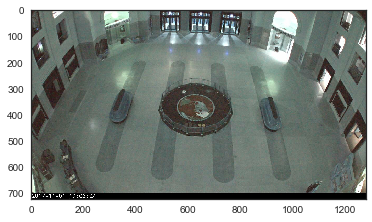

In [23]:
import cv2
import time
import seaborn as sns

# Will use matplotlib for showing the image
from matplotlib import pyplot as plt
%matplotlib inline


URL = 'http://184.80.5.148/mjpg/video.mjpg'

cap = cv2.VideoCapture(URL)


ret, frame = cap.read()


with sns.axes_style("white"):
    plt.imshow(frame)
#plt.imshow(frame)


In [24]:
frame.shape

(720, 1280, 3)

In [25]:
import subprocess

In [26]:
small = cv2.resize(frame, (0,0), fx=0.5, fy=0.5);
cv2.imwrite('cam.png', small)

True

In [29]:
cmd = "./darknet detector test cfg/coco.data cfg/yolo.2.0.cfg yolo.2.0.weights cam.png"



In [30]:
output = subprocess.check_output(cmd.split())


In [31]:
output.decode("utf-8").split("\n")

['cam.png: Predicted in 5.073244 seconds.', '']

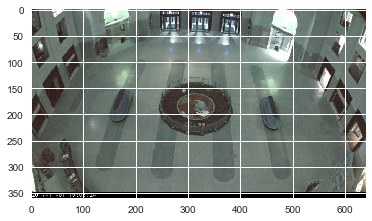

In [32]:
predictions = cv2.imread('predictions.png')
plt.imshow(predictions)

In [33]:
print(time.clock())

3.441118


In [34]:
time.time()
from IPython.display import display, Image, clear_output


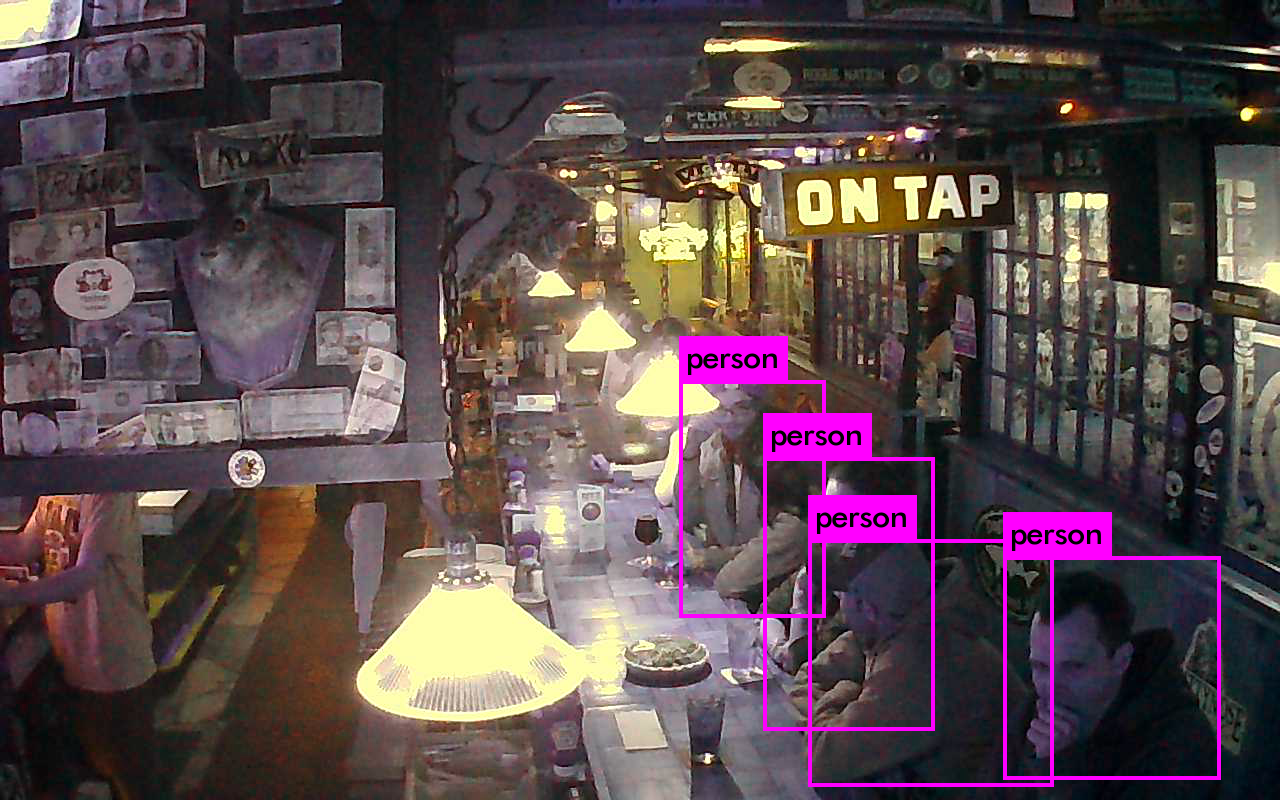

'cam.png: Predicted in 4.931100 seconds.'

'4 people detected.'

'Last updated at 19:09:14.'

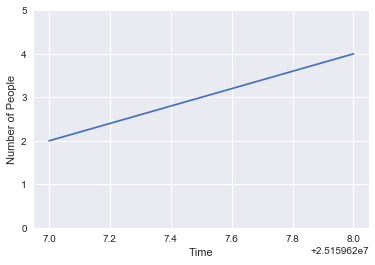

KeyboardInterrupt: 

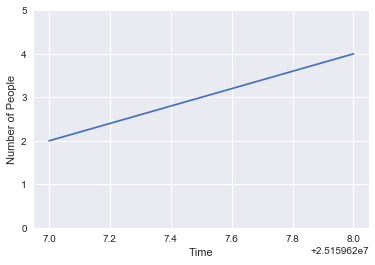

In [37]:

lastMin = time.time()//60
firstMin = lastMin
numChecks = 0
totalPeople = 0
xMinute = []
yPeople = []
last = 0
while True:
    #if time.time() - last > 30:
    last = time.time()
    cap = cv2.VideoCapture('http://24.103.196.243/cgi-bin/viewer/video.jpg?r=1509388702')
    #cap = cv2.VideoCapture('http://84.35.225.233:83/SnapshotJPEG?Resolution=640x480&amp;amp;Quality=Clarity&amp;amp;1509566566')
    
    currentMin = time.time() // 60
    
    ret, frame = cap.read()
    #small = cv2.resize(frame, (0,0), fx=0.5, fy=0.5);
    #small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB);

    #cv2.imwrite('cam.png', small)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB);
    cv2.imwrite('cam.png', frame)
    cmd = "./darknet detector test cfg/coco.data cfg/yolo.2.0.cfg yolo.2.0.weights cam.png"# -thresh .2"
    #cmd = "./darknet detector test cfg/coco.data cfg/yolo.cfg yolo.weights cam.png"# -thresh .2"
    output = subprocess.check_output(cmd.split())
    output = output.decode("utf-8").split("\n")

    clear_output(wait=True)
    
    display(Image('./predictions.png'))
    numPeople = len([i.split(":")[0] for i in output if i.split(":")[0] == 'person'])
    display(output[0])
    display("{} people detected.".format(numPeople))
    display("Last updated at {}.".format(time.strftime("%H:%M:%S", time.localtime())))
    
    numChecks += 1
    totalPeople += numPeople
    
    if currentMin > lastMin:
        xMinute.append(lastMin)
        yPeople.append(round(totalPeople/numChecks))
        lastMin = currentMin
        numChecks = 0
        totalPeople = 0
        
    if currentMin != firstMin:
        plt.plot(xMinute, yPeople)
        #plt.xlim(min(xMinute)-5, max(xMinute)+5)
        plt.ylim(0, max(yPeople)+1)
        plt.xlabel('Time')
        plt.ylabel('Number of People')
        display(plt.gcf())